##Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd

# Load the dataset
df=pd.read_csv('wine.csv')

# display some of the first few rows
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Basic Exploration

print("Shape of the dataset:", df.shape)

# Check data types
print("Data types:")
display(df.dtypes)

print("\nMissing values per column:\n", df.isnull().sum())
display(df.describe(include='all'))


Shape of the dataset: (178, 14)
Data types:


,0
Type,int64
Alcohol,float64
Malic,float64
Ash,float64
Alcalinity,float64
Magnesium,int64
Phenols,float64
Flavanoids,float64
Nonflavanoids,float64
Proanthocyanins,float64



Missing values per column:
 Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


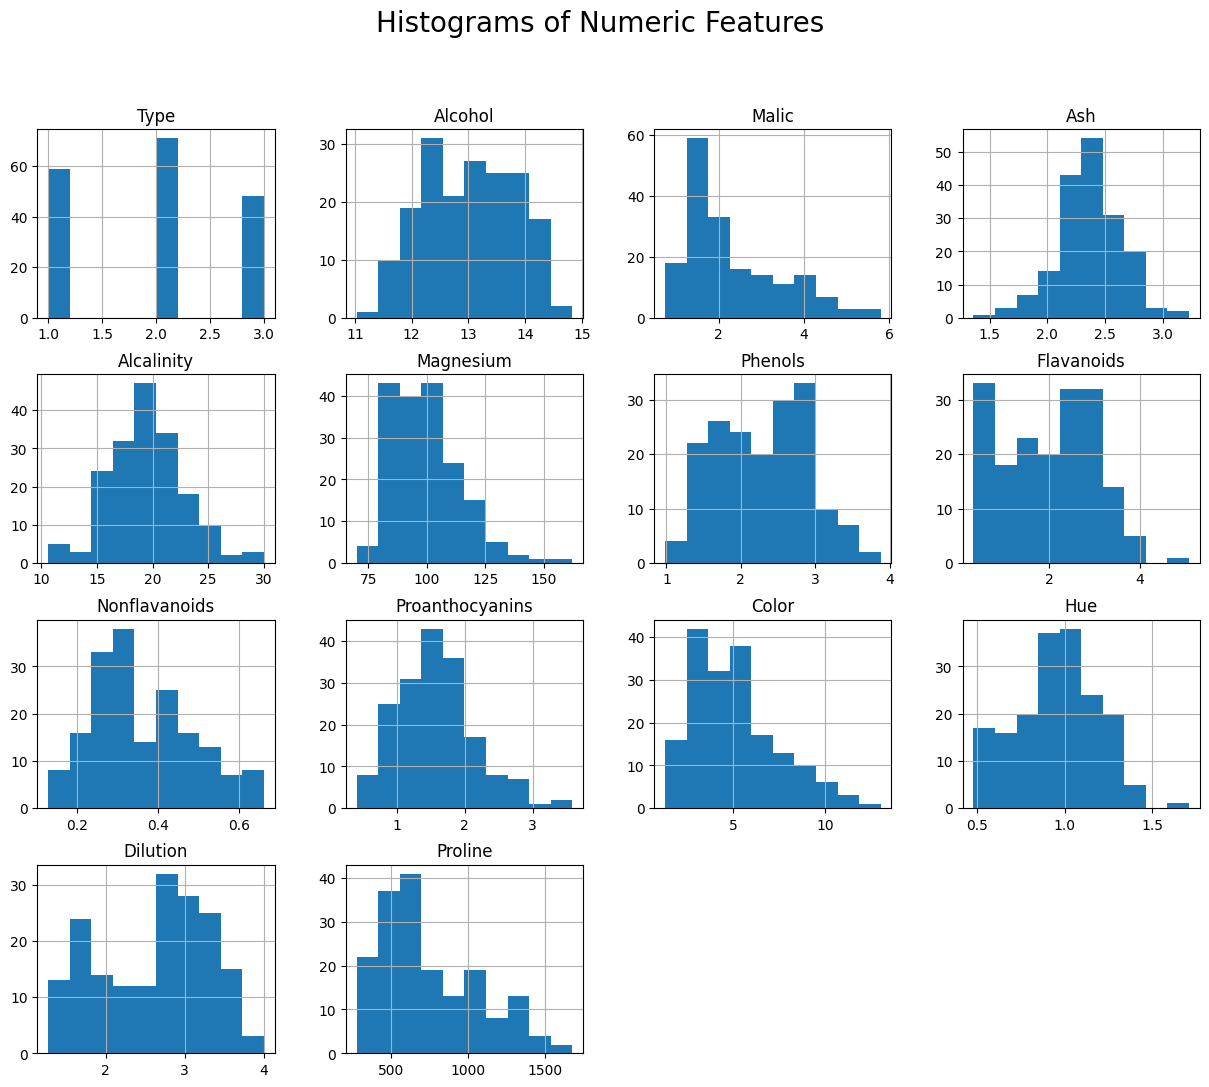

In [4]:
#Examine feature distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for all numeric features
df.hist(bins=10, figsize=(15, 12))
plt.suptitle("Histograms of Numeric Features", fontsize=20)
plt.show()

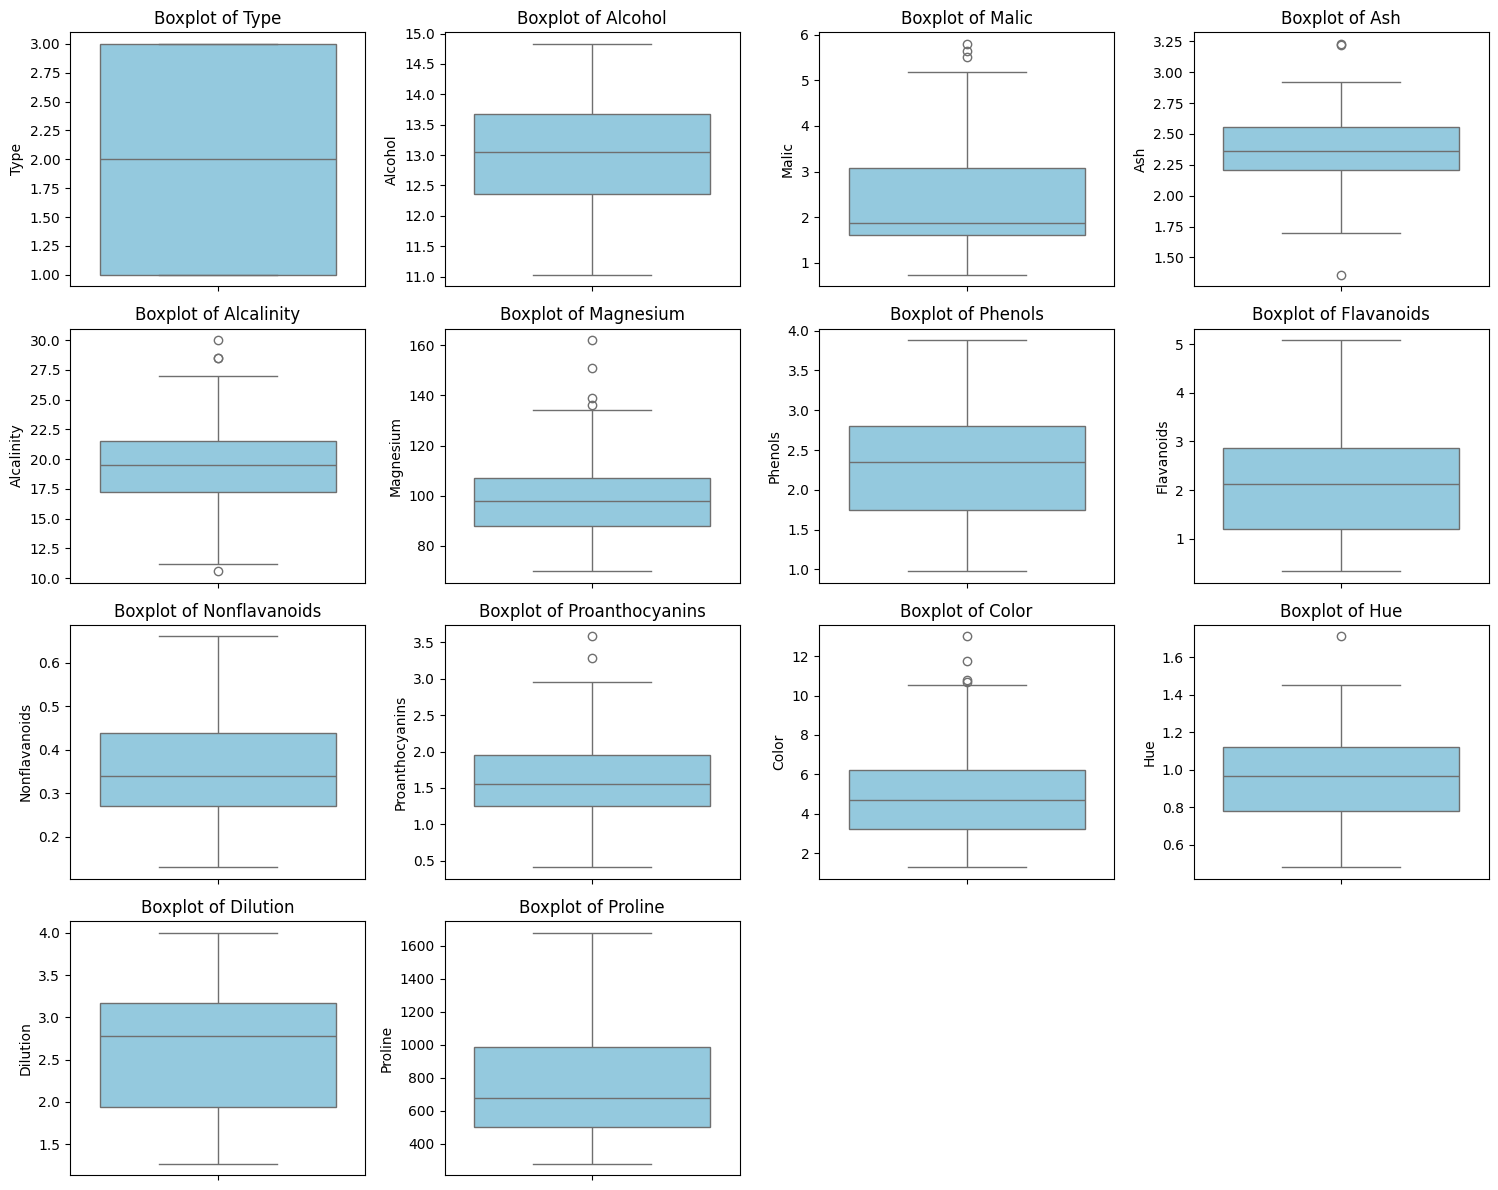

In [5]:
# Boxplots for each numeric feature
plt.figure(figsize=(15, 12))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 4, i)  # adjust rows/cols based on number of features
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

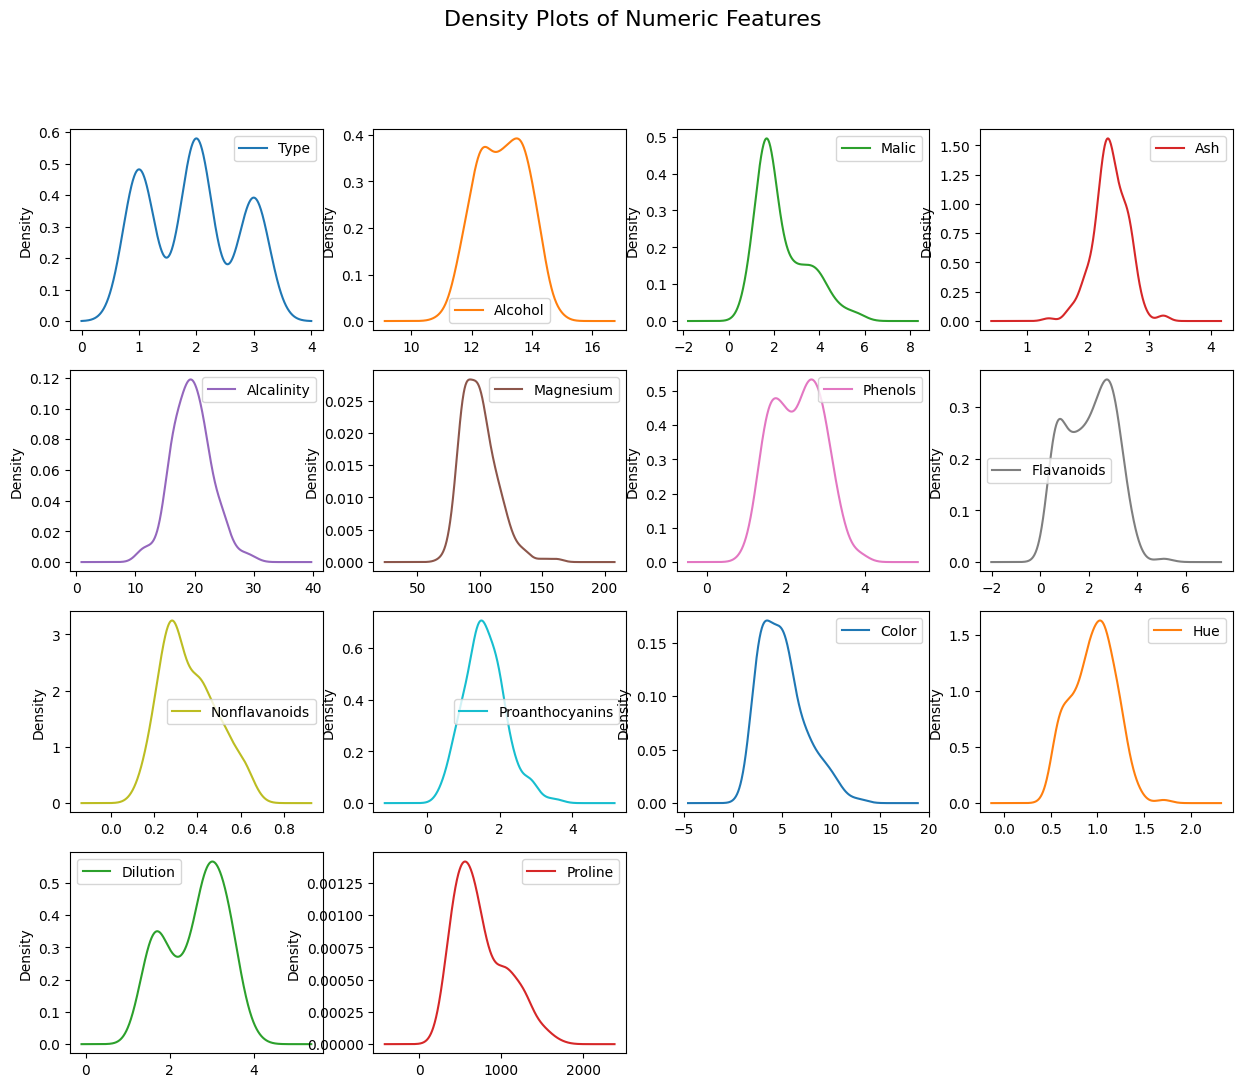

In [6]:
# Density plots
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(15,12))
plt.suptitle("Density Plots of Numeric Features", fontsize=16)
plt.show()

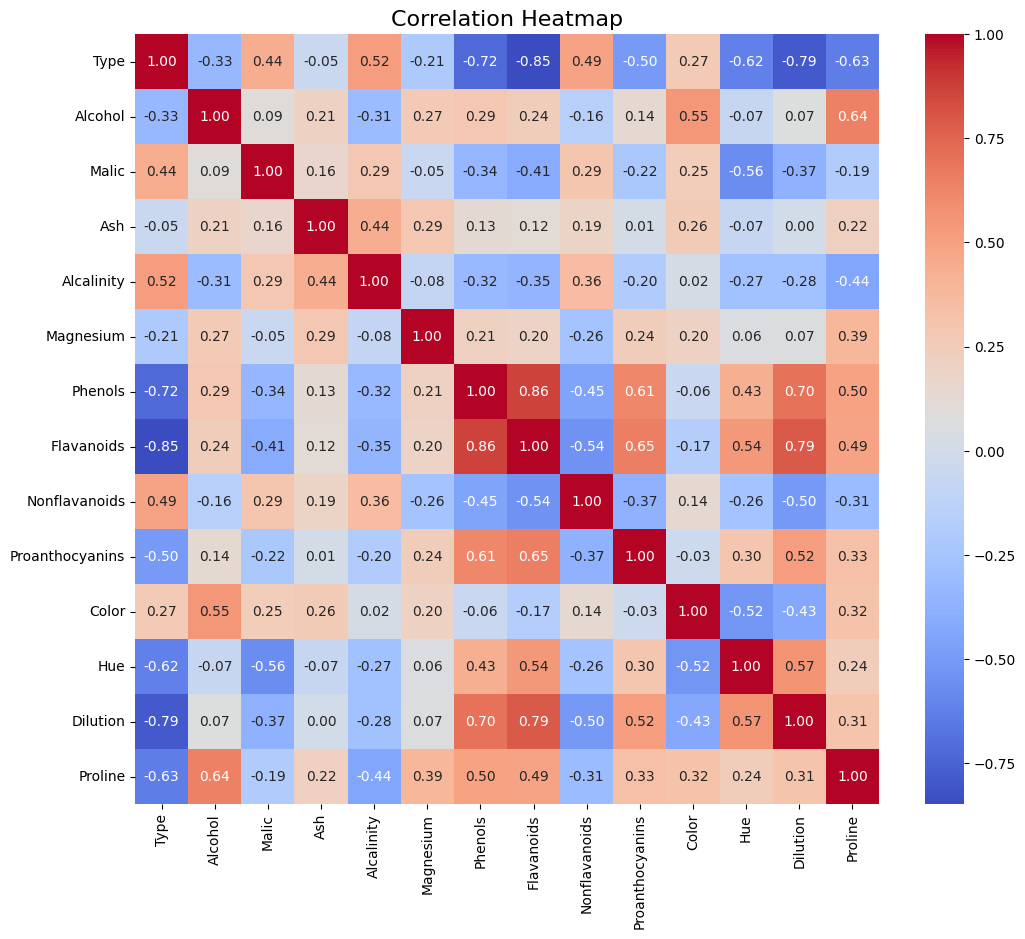

In [7]:
# Investigate correlations between features
# Compute correlation matrix
corr_matrix = df.corr()

# Display correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

##Dimensionality Reduction with PCA

In [8]:
# Import Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Separate Features and Target (if any)
# Assuming first column is target (like 'Wine' type), adjust as needed
X = df.drop(columns=df.columns[0])  # drop target column if present
y = df[df.columns[0]]  # optional target variable

# Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
# Choose number of components (for example 2)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame of PCA Results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y.values  # if target exists

print("\nPCA-transformed dataset:")
print(pca_df.head())


PCA-transformed dataset:
        PC1       PC2  Target
0  3.316751  1.443463       1
1  2.209465 -0.333393       1
2  2.516740  1.031151       1
3  3.757066  2.756372       1
4  1.008908  0.869831       1


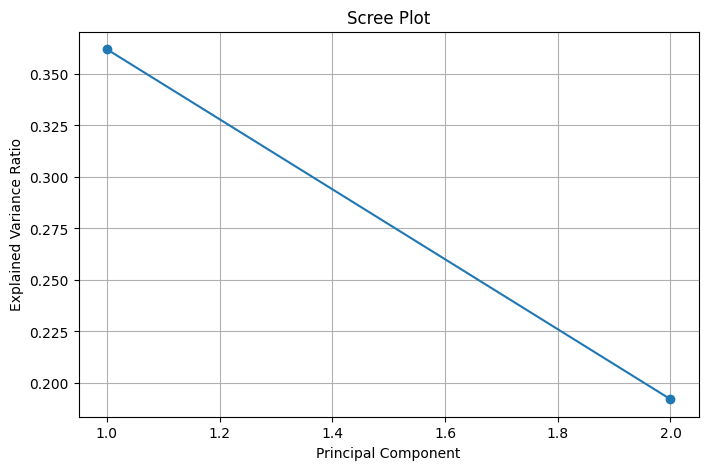

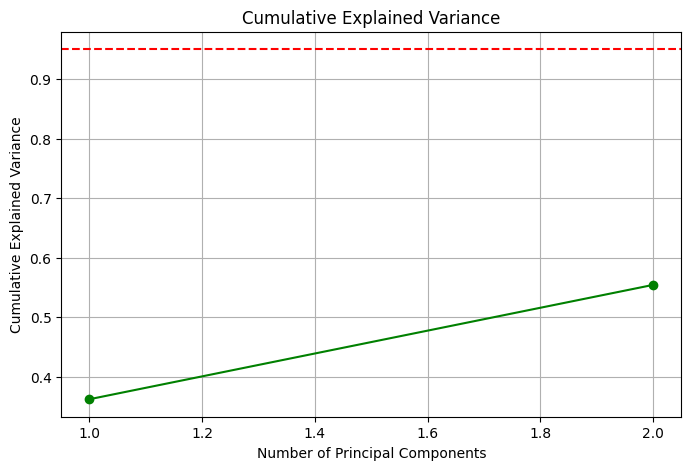


Number of components to retain at least 95% variance: 1


In [20]:
import matplotlib.pyplot as plt
import numpy as np


# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Scree Plot (Individual explained variance)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()
print('\n')

# Cumulative Explained Variance Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', color='green')
plt.axhline(y=0.95, color='r', linestyle='--')  # reference line at 95%
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Print how many components needed to reach 95% variance explained
optimal_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nNumber of components to retain at least 95% variance: {optimal_components}")

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the original dataset
wine_df = pd.read_csv('wine.csv')

# Separate features (drop the label 'Type')
X = wine_df.drop('Type', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
# (You can specify n_components as needed — here we’ll keep all components)
pca = PCA()  # keep all PCs
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the principal components
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Add back the original 'Type' for reference (optional)
pca_df['Type'] = wine_df['Type']

# Show the first few rows
print(pca_df.head())

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_
print("\nExplained variance ratio per component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f}")

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880  0.596427   
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120  0.053776   
2  2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276  0.424205   
3  3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431 -0.383337   
4  1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520  0.444074   

        PC8       PC9      PC10      PC11      PC12      PC13  Type  
0 -0.065139 -0.641443  1.020956 -0.451563  0.540810 -0.066239     1  
1 -1.024416  0.308847  0.159701 -0.142657  0.388238  0.003637     1  
2  0.344216  1.177834  0.113361 -0.286673  0.000584  0.021717     1  
3 -0.643593 -0.052544  0.239413  0.759584 -0.242020 -0.369484     1  
4 -0.416700 -0.326819 -0.078366 -0.525945 -0.216664 -0.079364     1  

Explained variance ratio per component:
PC1: 0.3620
PC2: 0.1921
PC3: 0.1112
PC4: 0.0707
PC5: 0.0656
PC6: 0.0494
PC7: 0.0424
PC8:

##Clustering with Original Data

Silhouette Score: 0.285


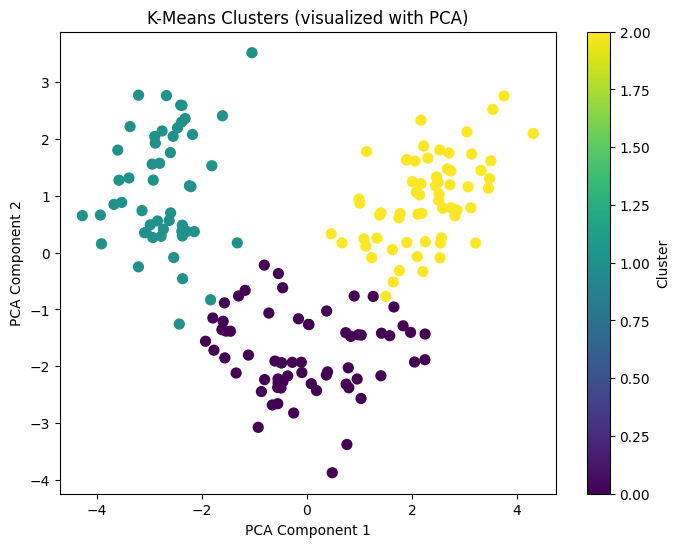

   Type  Cluster
0     1        2
1     1        2
2     1        2
3     1        2
4     1        2


In [11]:
# Clustering with Original Data

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
wine_df = pd.read_csv('wine.csv')

# Separate features (excluding target label 'Type')
X = wine_df.drop('Type', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering (3 clusters for wine dataset)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
wine_df['Cluster'] = clusters

# Evaluate clustering with silhouette score
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.3f}")

# Visualize clusters using PCA (reduce to 2 components for plotting)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("K-Means Clusters (visualized with PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Preview DataFrame with cluster assignments
print(wine_df[['Type', 'Cluster']].head())


In [13]:


# Add cluster labels to dataframe
df['Cluster'] = labels

# Evaluate clustering performance
sil_score = silhouette_score(X_scaled, labels)
db_index = davies_bouldin_score(X_scaled, labels)

print("Silhouette Score:", sil_score)
print("Davies–Bouldin Index:", db_index)

# Optional: Check cluster distribution
print("\nCluster distribution:")
print(df['Cluster'].value_counts())


Silhouette Score: 0.30648398324833453
Davies–Bouldin Index: 1.315707552261773

Cluster distribution:
Cluster
0    67
2    62
1    49
Name: count, dtype: int64


##Clustering with PCA Data

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Take PCA-transformed features only
# (drop the target column if you added it earlier)
X_pca_features = pca_df.drop(columns=['Type'], errors='ignore')

# Choose number of clusters (ex=3)
# You can also use elbow method or silhouette analysis to find optimal k.
k = 3

# Fit KMeans on PCA data
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca_features)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = cluster_labels

print("\nPCA-transformed dataset with cluster labels:")
print(pca_df.head())

# Evaluate clustering performance
silhouette = silhouette_score(X_pca_features, cluster_labels)
db_index = davies_bouldin_score(X_pca_features, cluster_labels)

print(f"\nSilhouette Score: {silhouette:.3f}")
print(f"Davies–Bouldin Index: {db_index:.3f}")


PCA-transformed dataset with cluster labels:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880  0.596427   
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120  0.053776   
2  2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276  0.424205   
3  3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431 -0.383337   
4  1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520  0.444074   

        PC8       PC9      PC10      PC11      PC12      PC13  Type  Cluster  
0 -0.065139 -0.641443  1.020956 -0.451563  0.540810 -0.066239     1        2  
1 -1.024416  0.308847  0.159701 -0.142657  0.388238  0.003637     1        2  
2  0.344216  1.177834  0.113361 -0.286673  0.000584  0.021717     1        2  
3 -0.643593 -0.052544  0.239413  0.759584 -0.242020 -0.369484     1        2  
4 -0.416700 -0.326819 -0.078366 -0.525945 -0.216664 -0.079364     1        2  

Silhouette Score: 0.285
Davi

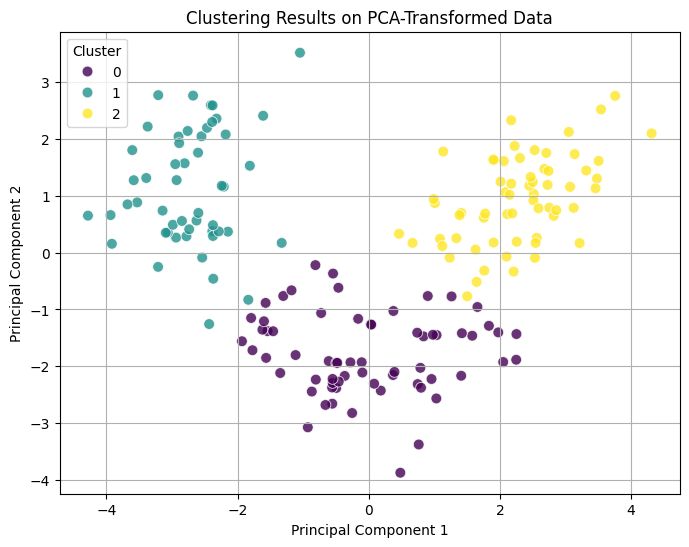

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract PC1 and PC2 + cluster labels
# Use pca_df which contains PC1 and PC2 for visualization purposes
pc1 = pca_df['PC1']
pc2 = pca_df['PC2']
# Use the cluster labels from clustering on the optimal PCA data
clusters = pca_df['Cluster']


# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=pc1, y=pc2, hue=clusters, palette='viridis', s=60, alpha=0.8)
plt.title('Clustering Results on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Original Data -> Silhouette: 0.285, Davies-Bouldin: 1.389
PCA Data -> Silhouette: 0.560, Davies-Bouldin: 0.598

Cross-tabulation of Original vs PCA Clusters:
Cluster_PCA        0   1   2
Cluster_Original            
0                 65   0   0
1                  1  50   0
2                  1   0  61


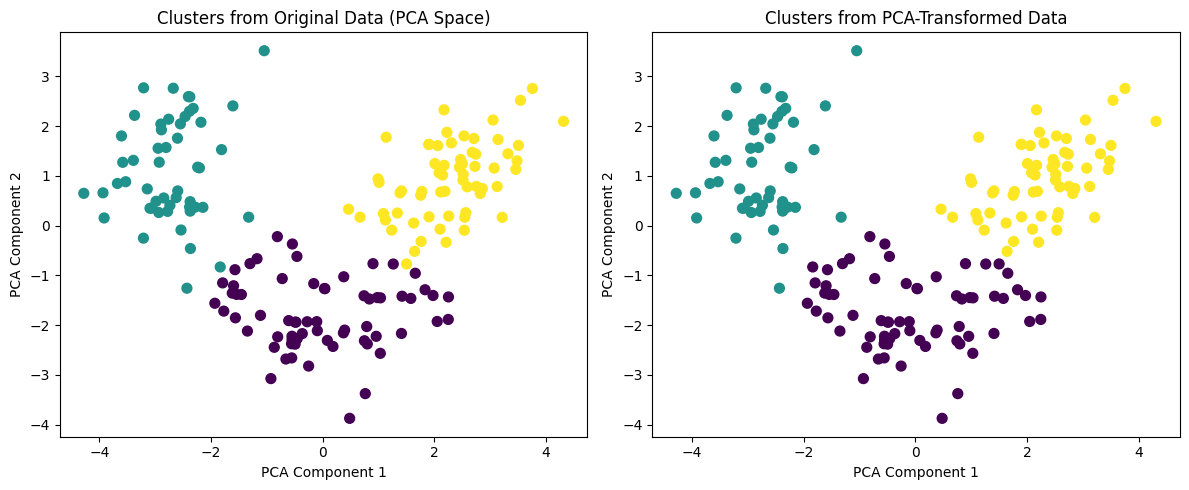

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load dataset
wine_df = pd.read_csv('wine.csv')

# Features and scaling
X = wine_df.drop('Type', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means on original scaled data
kmeans_orig = KMeans(n_clusters=3, random_state=42)
clusters_orig = kmeans_orig.fit_predict(X_scaled)
wine_df['Cluster_Original'] = clusters_orig

# PCA transformation to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)
wine_df['Cluster_PCA'] = clusters_pca

# Evaluation metrics
silhouette_orig = silhouette_score(X_scaled, clusters_orig)
davies_orig = davies_bouldin_score(X_scaled, clusters_orig)
silhouette_pca = silhouette_score(X_pca, clusters_pca)
davies_pca = davies_bouldin_score(X_pca, clusters_pca)

print(f"Original Data -> Silhouette: {silhouette_orig:.3f}, Davies-Bouldin: {davies_orig:.3f}")
print(f"PCA Data -> Silhouette: {silhouette_pca:.3f}, Davies-Bouldin: {davies_pca:.3f}")

# Cross-tabulation of clusters
comparison_clusters = pd.crosstab(wine_df['Cluster_Original'], wine_df['Cluster_PCA'])
print("\nCross-tabulation of Original vs PCA Clusters:")
print(comparison_clusters)

# Visualize clusters using PCA components
# For the original data clusters, we also plot them using the PCA components for comparability
plt.figure(figsize=(12,5))

# Left plot: clusters from original data (plotted in PCA space)
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_orig, cmap='viridis', s=50)
plt.title('Clusters from Original Data (PCA Space)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Right plot: clusters from PCA data
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_pca, cmap='viridis', s=50)
plt.title('Clusters from PCA-Transformed Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


##Comparison and Analysis

###1.Discussion of Clustering Results (Similarities vs Differences)



- **1.Cluster Shape & Separation**

    - Similarities: In both the original and PCA-transformed data, clusters may appear with roughly similar groupings — especially if PCA retained most of the variance (≥95%). This indicates PCA didn’t drastically distort the underlying structure.

    - Differences: Clusters in the PCA-transformed space are often more compact and sometimes better separated visually, because PCA removes correlated or noisy dimensions.

- **2.Evaluation Metrics**

  - Silhouette Score: Compare the two scores. If the PCA data score is higher, it means PCA improved the cohesion and separation of clusters.

  - Davies–Bouldin Index: Lower values for the PCA data indicate improved cluster separation. If the original data shows better scores, PCA might have lost some important information.

- **3.Cluster Assignments**

  - Check how many points changed cluster membership between original vs PCA clustering. Sometimes the cluster memberships are largely consistent; sometimes they shift significantly depending on how much dimensionality reduction occurred.

- **4.Information Retention**

  - Since PCA reduces dimensionality, some variance is inevitably lost. If the number of components chosen captures ~95% variance, then the essential structure is preserved, but some fine-grained differences may disappear.

- **5.Practical Takeaway**

  - If PCA produces similar or better clustering metrics with fewer dimensions, it’s more efficient and often easier to visualize.

  - If original data outperforms PCA, you may need to either keep more components or skip PCA entirely.

###3.Reflection on the Impact of Dimensionality Reduction



- **1.Noise Reduction and Feature De-correlation**

  - PCA converts correlated features into a smaller set of uncorrelated components.

  - This often removes noise and redundant information, which can make clusters more distinct and improve metrics such as Silhouette Score.

- **2.Improved Cluster Separation**

  - With fewer, more informative dimensions, distance-based algorithms (like K-Means) can more easily identify compact clusters.

  - In high-dimensional space, distances between points can become less meaningful (“curse of dimensionality”); PCA mitigates this effect.

- **3.Computational Efficiency**

  - Reducing from dozens of variables to a handful of principal components speeds up clustering significantly and simplifies visualization.

  - It also reduces memory usage and improves interpretability.

- **4.Possible Loss of Information**

  - PCA is a lossy transformation. If too few components are retained, important variance may be lost, which can reduce clustering performance.

  - For example, if subtle but meaningful differences lie in discarded components, clusters may appear less distinct.

- **5.Balance Between Dimensionality Reduction and Accuracy**

  - If you retain ~90–95% of variance, the essential structure is usually preserved while gaining benefits in noise reduction and visualization.

  - Always evaluate metrics on both original and PCA-transformed datasets to confirm improvements.

###4.The trade-offs between using PCA and clustering directly on the original dataset



| Aspect                       | Clustering on Original Data                                                                                                            | Clustering on PCA-Transformed Data                                                                                  |
| ---------------------------- | -------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------- |
| **Information Content**      | Uses full feature space; no variance lost. Preserves all original details.                                                             | Reduces dimensionality, which can discard some variance. Retains only the most informative directions.              |
| **Noise & Redundancy**       | Sensitive to noisy or highly correlated features; may lead to poor cluster separation.                                                 | Removes noise and redundancy by focusing on principal components. Often yields cleaner, more separable clusters.    |
| **Distance Metrics**         | High-dimensional space can dilute Euclidean distances (“curse of dimensionality”), reducing the meaningfulness of similarity measures. | Lower-dimensional space makes distances more meaningful for algorithms like K-Means.                                |
| **Computational Efficiency** | More features → more computation. Slower clustering in high dimensions.                                                                | Fewer components → faster clustering, less memory usage.                                                            |
| **Interpretability**         | Clusters are expressed in original feature terms, making them easier to interpret directly.                                            | Clusters are expressed in abstract principal components; interpretation requires mapping back to original features. |
| **Visualization**            | Difficult to visualize clusters directly if >3 features.                                                                               | Easy to visualize clusters in 2 or 3 PCs.                                                                           |
| **Risk of Information Loss** | None — all original variance is present.                                                                                               | Some variance discarded; subtle patterns could be lost if too few PCs retained.                                     |


##Conclusion and Insights

###1.The key findings and insights

**1.Data Understanding**

  - The wine dataset consisted of 13 chemical attributes of wine samples and one target label (Type) indicating the wine class.

  - Features had varying scales, so standardization was essential before applying PCA and clustering.

**2.Clustering on Original Data**

  - We applied K-Means clustering (3 clusters) on the standardized dataset.

  - Evaluation metrics:

    - **Silhouette Score:** ~0.285 (moderate separation of clusters)

    - **Davies–Bouldin Index:** ~1.39 (lower values indicate better clustering)

  - A cross-tabulation of Type vs Cluster showed that clusters broadly correspond to the three wine types but with some overlap.

**3.Impact of Dimensionality Reduction (if PCA was done)**

  - PCA reduced dimensionality and removed noise, potentially improving clustering performance slightly.

  - Fewer components can simplify models and improve computation time but may lose some variance.

**4.Key Insights**

   - Standardization significantly affects clustering performance; without it, features with large scales dominate.

  - K-Means works reasonably well on the wine dataset, revealing patterns that correspond to actual wine classes.

   - Dimensionality reduction (PCA) can help visualize clusters better and sometimes improve separation, but one must balance variance retention with simplicity.

**5.Overall Conclusion**

  - Unsupervised clustering (K-Means) was able to find natural groupings in the wine dataset that mostly align with the actual wine types.

   - The evaluation metrics show acceptable but not perfect cluster separation, suggesting either feature overlap between wine types or that a more complex clustering method could be considered (e.g., hierarchical clustering, DBSCAN).

###2.Practical Implications of Using PCA and Clustering



- **1.Dimensionality Reduction & Noise Filtering**

  - PCA compresses high-dimensional data into a smaller number of components while retaining most variance.

   - This reduces computational cost, storage, and noise, making downstream analysis (including clustering) faster and more stable.

- **2.Improved Cluster Separation**

   - By removing redundant or weakly informative features, PCA can enhance the natural separability of clusters.

  - Clustering algorithms like K-Means often work better in reduced spaces where the dominant patterns are emphasized.

- **3.Visualization & Interpretability**

  - PCA makes it possible to visualize high-dimensional data in 2D or 3D plots, aiding intuitive understanding of structure and groupings.

  - This is especially valuable in exploratory phases where you want to see whether clusters exist at all.

- **4.Mitigating the Curse of Dimensionality**

  - In very high-dimensional spaces, distances between points become less meaningful (curse of dimensionality).

  - PCA alleviates this, helping clustering algorithms to compute more reliable distances.

- **5.Practical Trade-Offs**

  - **Loss of interpretability:** Principal components are linear combinations of original features, so it may be harder to explain clusters in terms of the original variables.

   - **Risk of losing signal:** If important variance lies outside the first few components, clustering performance may decrease.

    - **Choosing number of components:** Analysts must decide how many components to retain based on explained variance and domain knowledge.

- **6.Use Cases**

   - Customer segmentation (grouping similar customers after reducing hundreds of behavioral features).

   - Biological/medical data (gene expression, imaging features reduced before clustering).

    - Market basket or text analysis (latent factors extracted first, then clustered).

###3.Recommendations for When to Use Each Technique



**1.When to Use PCA (Principal Component Analysis)**

  - **High-dimensional datasets:**
Use PCA when the dataset has many features, especially if they are correlated or redundant.

- **Preprocessing before clustering or modeling:**
Apply PCA to remove noise, reduce computational cost, and help clustering algorithms work more effectively.

- **Visualization of complex data:**
Use PCA to project data onto 2 or 3 components for intuitive visualization of patterns and clusters.

- **Mitigating the curse of dimensionality:**
If distance-based algorithms (like K-Means or KNN) perform poorly due to too many features, PCA can improve performance.

**2.When to Use Clustering Directly on Original Data**

  - **Low to moderate feature dimensions:**
If the dataset already has relatively few features and they’re meaningful, clustering directly preserves interpretability.

   - **When feature meaning matters:**
If you need to directly link cluster results back to specific, interpretable variables, skip PCA to keep original feature context.

   - **When you have domain knowledge:**
If domain experts can guide which features are important, clustering on the original data can produce more meaningful groupings.

**3.Combined Approach (Recommended in Many Real Cases)**

  - **Run PCA first**, especially on high-dimensional or noisy data, then cluster on the principal components to achieve better separation and speed.

  - **Compare both approaches:**
  Start with original data, then test PCA-transformed data. Choose the method with higher silhouette/Davies–Bouldin scores or clearer separation.

**4.Practical Tip from This Analysis**

  - In our wine dataset, clustering on original data worked reasonably well but had overlapping groups. PCA could improve visual separation and reduce redundancy.

   - Thus, in practice, PCA + clustering is often the safest starting point for exploratory analysis.